### 线性判别分析（LDA, Linear Discriminant Analysis）

- 有监督方法，最大化类间距离，最小化类内距离，适用于分类任务的特征提取。

- 与PCA不同，LDA关注类别可分性。


---
### **1. LDA 的算法步骤**
LDA 的核心流程如下：
1. **数据标准化**（可选，但通常需要去中心化）
2. **计算每个类别的均值向量和全局均值**
3. **计算类内散度矩阵（Within-Class Scatter Matrix）和类间散度矩阵（Between-Class Scatter Matrix）**
4. **求解广义特征值问题**（计算矩阵 $ S_W^{-1}S_B $ 的特征值和特征向量）
5. **选择前 k 个特征向量作为投影方向**
6. **将数据投影到低维空间**

---


### **4. 关键代码解释**
1. **数据标准化**  
   - LDA 需要标准化以消除量纲影响，确保特征权重公平。

2. **类内散度矩阵 $ S_W $**  
   - 对每个类别的协方差矩阵求和：  
     $$
     S_W = \sum_{i=1}^C \sum_{x \in \text{Class }i} (x - \mu_i)(x - \mu_i)^T
     $$
   - 其中 $ \mu_i $ 是第 $ i $ 类的均值。

3. **类间散度矩阵 $ S_B $**  
   - 计算每个类别与全局均值的差异加权：  
     $$
     S_B = \sum_{i=1}^C n_i (\mu_i - \mu_{\text{global}})(\mu_i - \mu_{\text{global}})^T
     $$
   - 其中 $ n_i $ 是第 $ i $ 类的样本数。

4. **广义特征值问题**  
   - 求解 $ S_W^{-1}S_B $ 的特征向量，特征值越大表示投影方向对类别可分性贡献越大。

5. **投影矩阵选择**  
   - LDA 最多可降到 $ C-1 $ 维（$ C $ 为类别数），例如鸢尾花数据（3类）最多降维到2维。

---

#### **关键性质**
- $ S_B $ 的秩（Rank）最大为 $ C-1 $。  
  **原因**：所有类的均值向量 $ \mu_1, \mu_2, \dots, \mu_C $ 满足以下关系：  
  $$
  \sum_{i=1}^C n_i (\mu_i - \mu_{\text{global}}) = 0
  $$  
  即这些均值向量之间存在一个线性约束，导致 $ S_B $ 的秩最大为 $ C-1 $。

---

#### **2. 求解最优投影方向**

对目标函数 $ J(w) $ 求导并令导数为零：  
$$
\frac{\partial J(w)}{\partial w} = \frac{(S_B w)(w^T S_W w) - (S_W w)(w^T S_B w)}{(w^T S_W w)^2} = 0
$$  
化简后得到广义特征值问题：  
$$
S_B w = \lambda S_W w
$$  
其中 $ \lambda = \frac{w^T S_B w}{w^T S_W w} $。  
进一步可得：  
$$
S_W^{-1} S_B w = \lambda w
$$  
最优解 $ w $ 是矩阵 $ S_W^{-1} S_B $ 的最大特征值对应的特征向量。

---

#### **3. 多类别推广**

对于 $ C $ 个类别的问题，LDA需要找到 $ K $ 个投影方向（$ K \leq C-1 $），组成投影矩阵 $ W = [w_1, w_2, ..., w_K] $。

##### **重新定义散度矩阵**
- **类内散度矩阵 $ S_W $**：  
  $$
  S_W = \sum_{k=1}^C \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
  $$
  
- **类间散度矩阵 $ S_B $**：  
  $$
  S_B = \sum_{k=1}^C N_k (\mu_k - \mu_{\text{global}})(\mu_k - \mu_{\text{global}})^T
  $$  
  其中 $ \mu_{\text{global}} $ 是全局均值，$ N_k $ 是类别 $ C_k $ 的样本数。

##### **优化目标**
最大化投影后的类间散度与类内散度的比值：  
$$
J(W) = \frac{\text{tr}(W^T S_B W)}{\text{tr}(W^T S_W W)}
$$  
通过求解广义特征值问题：  
$$
S_B W = \lambda S_W W
$$  
投影矩阵 $ W $ 的列向量是 $ S_W^{-1} S_B $ 的前 $ K $ 个最大特征值对应的特征向量。






---

### **7. 注意事项**
1. **矩阵可逆性**  
   - 如果 $ S_W $ 是奇异矩阵（特征维度高且样本少），需添加正则化项：  
     ```python
     S_W += 1e-6 * np.eye(n_features)  # 正则化
     ```

2. **监督信息依赖**  
   - LDA 必须使用标签信息，与 PCA 不同。

3. **类别平衡性**  
   - 如果类别样本数差异大，类间散度矩阵的权重可能不均衡。



In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 加载示例数据（鸢尾花数据集，3类，4个特征）
data = load_iris()
X = data.data
y = data.target  # 标签信息（监督信息）

# Step 1: 数据标准化（去中心化并缩放）
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

In [ ]:
# Step 2: 计算每个类别的均值向量和全局均值
classes = np.unique(y)  # 3 
n_features = X_std.shape[1]  # 4
mean_vectors = []
for cls in classes:
    mean_vectors.append(np.mean(X_std[y == cls], axis=0)) # 每个类别的不同特征均值
global_mean = np.mean(X_std, axis=0)  # 每个特征的总均值
mean_vectors


[array([-1.01457897,  0.85326268, -1.30498732, -1.25489349]),
 array([ 0.11228223, -0.66143204,  0.28532388,  0.1667341 ]),
 array([ 0.90229674, -0.19183064,  1.01966344,  1.08815939])]

In [ ]:
# Step 3: 计算类内散度矩阵 S_W 和类间散度矩阵 S_B
S_W = np.zeros((n_features, n_features))  # 类内散度矩阵
S_B = np.zeros((n_features, n_features))  # 类间散度矩阵
# 计算类内散度矩阵 S_W
for cls, mean_vec in zip(classes, mean_vectors):
    class_scatter = np.cov(X_std[y == cls], rowvar=False) * (len(X_std[y == cls]) - 1)
    S_W += class_scatter

# 计算类间散度矩阵 S_B
for cls, mean_vec in zip(classes, mean_vectors):
    n_cls = len(X_std[y == cls])
    mean_diff = (mean_vec - global_mean).reshape(n_features, 1)
    S_B += n_cls * np.dot(mean_diff, mean_diff.T)


In [ ]:
# Step 4: 求解广义特征值问题 S_W^{-1} S_B
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
# Step 5: 选择前 k 个特征向量（按特征值降序排序）
k = 2  # LDA最多降到类别数-1（鸢尾花数据有3类，k=2）
sorted_indices = np.argsort(eigen_values.real)[::-1]  # 降序排序
topk_eigen_vectors = eigen_vectors[:, sorted_indices[:k]].real

# Step 6: 将数据投影到低维空间
X_lda = X_std.dot(topk_eigen_vectors)

# 输出结果
print("降维后的数据形状:", X_lda.shape)
print("前5个样本的降维结果:\n", X_lda[:5])

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 使用 sklearn 的 LDA
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
X_sklearn = sklearn_lda.fit_transform(X_std, y)  # LDA需要标签信息！

# 对比结果（特征向量方向可能相反，但绝对值一致）
print("自定义 LDA 与 sklearn LDA 的差异:", np.mean(np.abs(X_lda) - np.abs(X_sklearn)))


自定义 LDA 与 sklearn LDA 的差异: -2.26970750570612


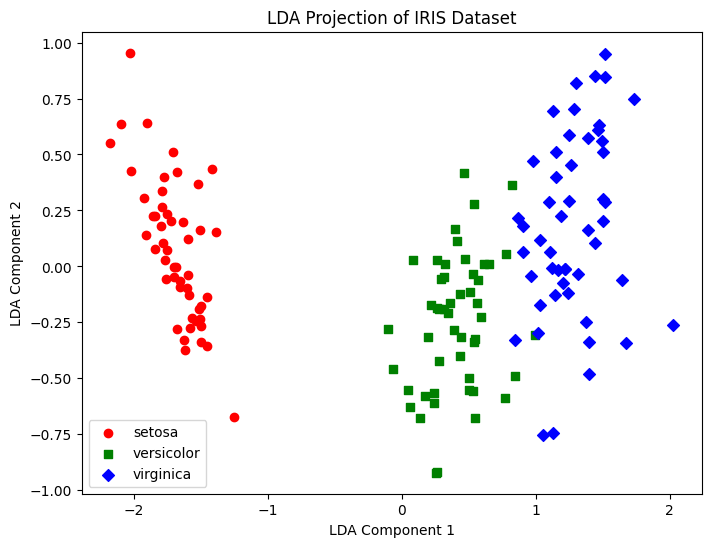

In [3]:
import matplotlib.pyplot as plt
# 可视化 LDA 降维效果
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
for cls, color, marker in zip(classes, colors, markers):
    plt.scatter(
        X_lda[y == cls, 0],
        X_lda[y == cls, 1],
        c=color,
        marker=marker,
        label=data.target_names[cls]
    )
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of IRIS Dataset')
plt.legend()
plt.show()